In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy import stats

In [2]:
# Input data
df = pd.read_csv('E://springboard//capstone_project_1//clean_data/clean_data.csv', encoding='ISO-8859-1', 
                  index_col=[0], dtype={'Zip':'category'})

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# Normalize District Column
df.District = df.District.apply(lambda x: str(x) if type(x) != str else x)

In [4]:
# Index Incident type and Time with Incident count
df1 = df.groupby(['Time', 'Incident Type'], as_index=False).agg({'Incident Number':'count'})

In [5]:
df1['Time'] = pd.to_datetime(df1['Time'], format='%m/%d/%Y %H')
df1['Month'] = df1['Time'].dt.strftime('%Y/%m')

In [7]:
from textwrap import fill
labels = ['Fire', 'Overpressure Rupture, Explosion, Overheat(No Fire)', 'Hazardous Condition(No Fire)', 
          'Service Call', 'Good Intent Call', 'False Alarm & False Call', 'Severe Weather & Natural Disaster', 
          'Special Incident Type']
labels = [fill(l, 20) for l in labels]

In [6]:
df1['Month'] = df1['Time'].dt.strftime('%Y/%m')
df2 = df1.groupby(['Month', 'Incident Type'])['Incident Number'].agg(['sum']).reset_index()

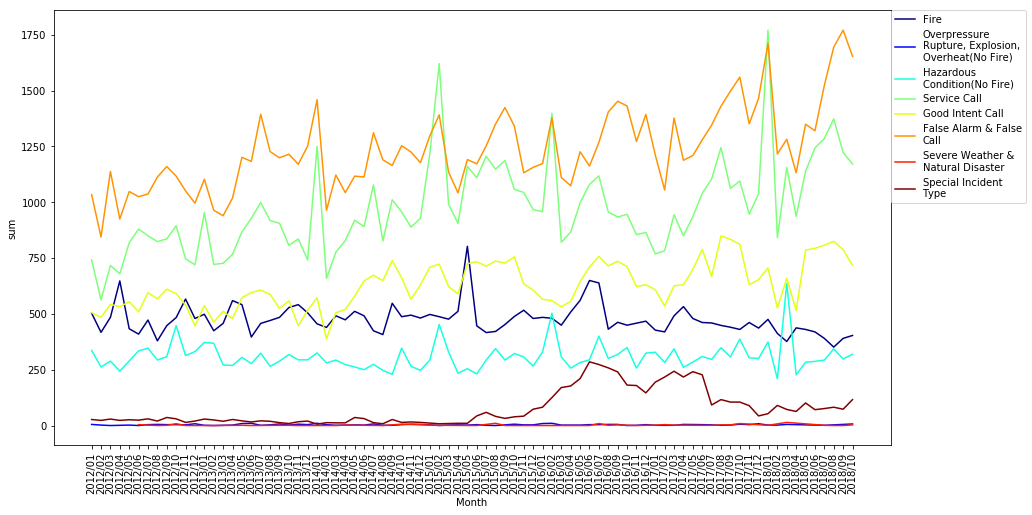

In [8]:
# Mean count of Monthly Incident Incident for each type

from matplotlib.dates import MonthLocator, DateFormatter
import matplotlib.ticker as ticker

plt.figure(figsize=(15,8))
sns.lineplot(x='Month', y='sum', hue='Incident Type', data=df2, palette = 'jet')
#sns.lineplot(x='Month', y='sum', data=df3)
#ax = plt.gca()
#ax.xaxis.set_major_locator(MonthLocator())
#monthFmt = DateFormatter('%Y/%m')
#ax.xaxis.set_major_formatter(monthFmt)
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1, 1), borderaxespad=0., labels=labels)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


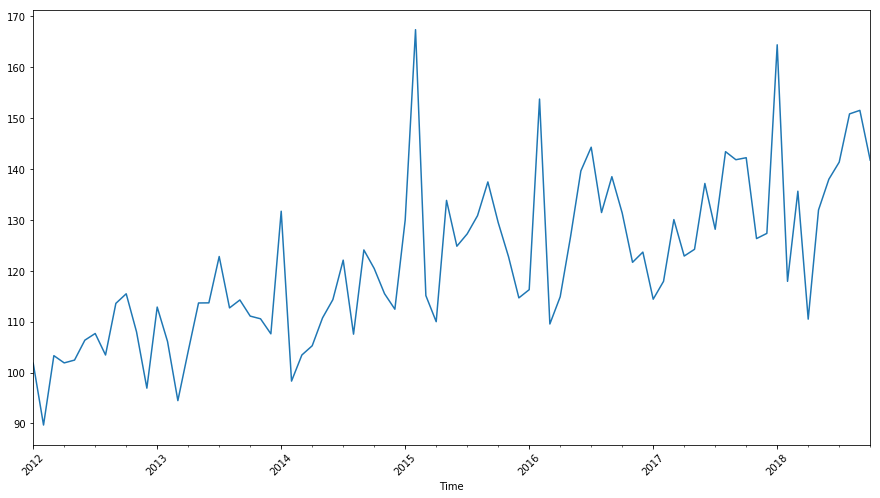

In [12]:
# Monthly mean count of Incident Report

from statsmodels.tsa.stattools import adfuller
df2 = df1.set_index('Time').resample('D').sum().resample('M').mean()['Incident Number']
plt.figure(figsize=(15,8))
df2.plot()
plt.xticks(rotation=45)
plt.show()

In [14]:
# Test if average monthly incident count is time dependent
result = adfuller(df2.values)
print('p-value: %f' % result[1])

if result[1] <= 0.05:
    print('Reject H0 Hypothesis. The mean value of monthly incident count is NOT time-dependent.')
else:
    print('Fail to reject H0 Hypothesis. The mean value of monthly incident count is somehwhat time-dependent')

p-value: 0.856808
Fail to reject H0 Hypothesis. The mean value of monthly incident count is somehwhat time-dependent


In [18]:
# Test Incident Type is time dependent
df2 = df1.set_index('Time')['Incident Type']

result = adfuller(df2.values)
print('p-value: %f' % result[1])

if result[1] <= 0.05:
    print('Reject H0 Hypothesis. The real-time incident type is NOT time-dependent.')
else:
    print('Fail to reject H0 Hypothesis. The real-time incident type is somehwhat time-dependent')

p-value: 0.000000
Reject H0 Hypothesis. The real-time incident type is NOT time-dependent.


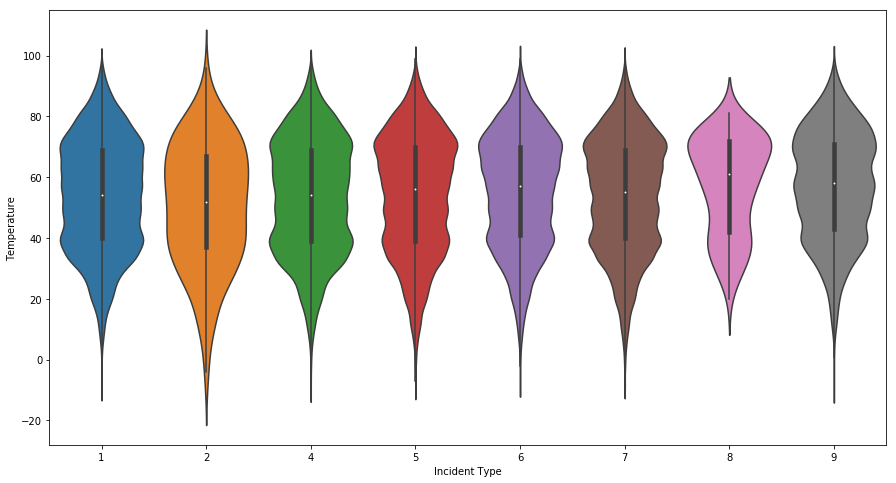

In [36]:
plt.figure(figsize=(15,8))
sns.violinplot(x='Incident Type', y='Temperature', data=df, scale='width')
plt.show()

In [41]:
# Bootstrap Incident Type and Temperature data 
from sklearn.utils import resample
boot = resample(df[['Incident Type', 'Temperature']], replace=True, n_samples=10000, random_state=1)

In [44]:
# Test the correlation of them
import scipy.stats as stas

contingency_table=pd.crosstab(boot['Temperature'].values, boot['Incident Type'].values)
Observed_Values = contingency_table.values
b=stats.chi2_contingency(contingency_table)
Expected_Values = b[3]

test0= stats.chisquare(Observed_Values, Expected_Values)

In [52]:
if test0[1].all() > 0.05:
    print('Fail to reject H0 Hypothesis. That means Temperature has correlation with Incident Type')
else: 
    print('Reject H0 Hypothesis. That means Temperature has NO correlation with Incident Type')

Fail to reject H0 Hypothesis. That means Temperature has correlation with Incident Type


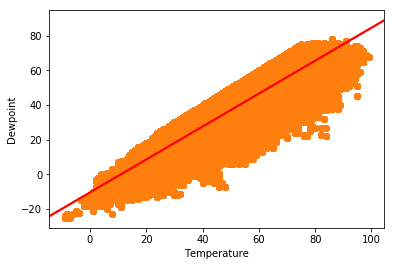

In [68]:
# Test if temperature and dewpoint has linear correlation
sns.regplot(x='Temperature', y='Dewpoint', data=df, line_kws={'color':'red'})
plt.show()

In [76]:
# Bootstrap data
l_boot = resample(df[['Dewpoint', 'Temperature']], replace=True, n_samples=10000, random_state=1)

In [82]:
# Use pearson to test our hypothesis
from scipy.stats import pearsonr

corr, p_value = pearsonr(l_boot['Temperature'], l_boot['Dewpoint'])

if p_value <= 0.05:
    print('Reject H0 Hypothesis. There is a linear correlation between Temperature and Dewpoint.')
else:
    print('Accept H0 Hypothesis. There is no linear correlation between Temperature and Dewpoint.')

if corr > 0.5:
    print('Dewpoint has strong linear correlation with Temperature')
else:
    print('Dewpoint has weak linear correlation with Temperature')

Reject H0 Hypothesis. There is a linear correlation.
Dewpoint has strong linear correlation with Temperature
